<a href="https://colab.research.google.com/github/eliasfeitoza/Curso-Data-Science-na-Pratica/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>



# <center> Análise dos Dados do Airbnb - Los Angeles </center>

* O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

* Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

* No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

* Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<b><center>Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.</b></center>

<center><img src="https://bit.ly/325z87D" height="200px"></center>

#<center>Los Angeles City</center><hr></hr>

* Los Angeles é uma grande cidade do sul da Califórnia e também o centro da indústria de cinema e televisão do país. Perto do famoso letreiro de Hollywood, é possível conhecer os bastidores das produções nos estúdios Paramount Pictures, Universal e Warner Brothers. Na Hollywood Boulevard, o TCL Chinese Theatre exibe impressões de mãos e pés de celebridades na Calçada da Fama, uma homenagem a milhares de astros, e se pode comprar mapas das casas dos artistas.

## Obtenção dos Dados


<h6> * Todos os dados utilizados neste projeto foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)</h6>

* Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

1. `listings.csv` - *Summary information and metrics for listings in Los Angeles (good for visualisations).*
1. `listings.csv` - Informações resumidas e métricas para listagens em Los Angeles (bom para visualizações)

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://bit.ly/2UGgeCi")

## Análise dos Dados


* Esta etapa tem como objetivo facilitar o entendimento dos campos inseridos no <b>DataSet (Tabela)</b> bem como facilitar a localização de algum dado específico!!


**Dicionário das variáveis**

* `id` - <i>número de id gerado para identificar o imóvel</i>
* `name` -<i> nome da propriedade anunciada</i>
* `host_id` <i>- número de id do proprietário (anfitrião) da propriedade</i>
* `host_name` <i>- nome do anfitrião</i>
* `neighbourhood_group`<i> - esta coluna não contém nenhum valor válido</i>
* `neighbourhood` <i>- nome do bairro</i>
* `latitude` <i>- coordenada da latitude da propriedade</i>
* `longitude`<i> - coordenada da longitude da propriedade</i>
* `room_type` <i>- informa o tipo de quarto que é oferecido</i>
* `price` <i>- preço para alugar o imóvel,</i>
* `minimum_nights`<i> - quantidade mínima de noites para reservar</i>
* `number_of_reviews` <i>- número de reviews que a propriedade possui</i>
* `last_review` <i>- data do último review</i>
* `reviews_per_month` <i>- quantidade de reviews por mês</i>
* `calculated_host_listings_count`<i> - quantidade de imóveis do mesmo anfitrião</i>
* `availability_365`<i> - número de dias de disponibilidade dentro de 365 dias</i>


<b>Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.</b>

In [3]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,248
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.19,1,62
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,2019-08-31,0.33,2,252
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,2019-10-03,0.19,2,344
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

* Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

* Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Variáveis:	 40125
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

1. É possível ver que a coluna `reviews_per_month` possui <b>20,30%</b> dos seus valores faltantes. 

2. As variáveis `last reviews` e possui <b>20,30%</b> dos seus valores faltantes.

3. As variáveis `host_name` tem <b>1,08%</b> dos valores nulos faltantes.

<b><center>Com os numeros apresentados a nós, podemos concluir que os dados considerados nulos não impcatara em nossa análise.

In [19]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

n = (df.isnull().sum() / df.shape[0]).sort_values(ascending = False)
df_n = pd.DataFrame(n)
df_n.style.format("{:.2%}")




,0
reviews_per_month,20.30%
last_review,20.30%
host_name,1.08%
name,0.00%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%
room_type,0.00%


### **Q3. Qual o tipo de distribuição das variáveis?** 

* Para identificar a distribuição das variáveis, irei plotar o histograma.

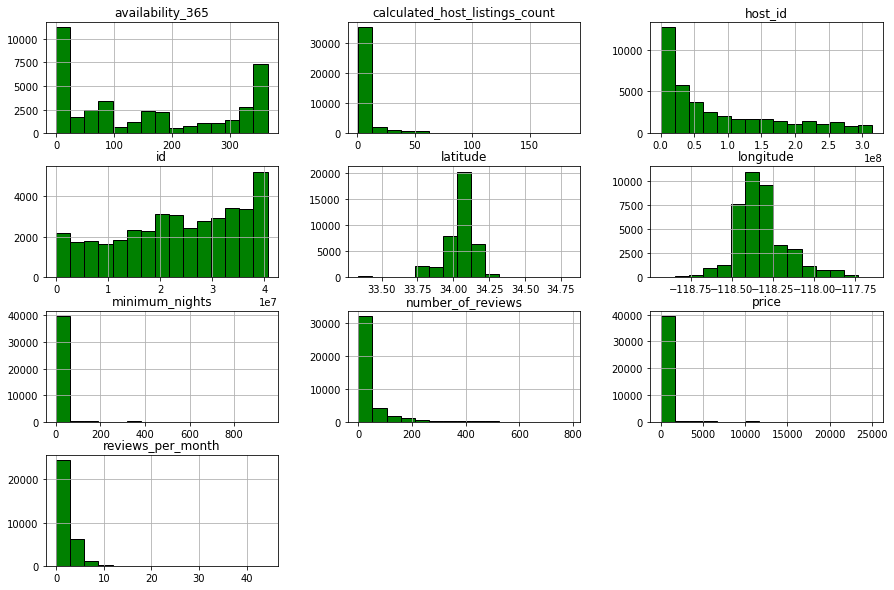

In [15]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15,color='green',edgecolor='black', figsize = (15,10));

### **Q4. Qual a média dos preços de aluguel?**

* Para uma melhor decisão no momento de pesquisa, abaixo demonstramos a <b>média de valores</b> de aluguéis oferecidos para a cidade de <b>Los Angeles.</b>

In [16]:
# ver a média da coluna `price``

df["price"].mean()

SyntaxError: ignored

###**Q5. Há OutLiers presente?**

* Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

* Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

* Os outliers podem viesar negativamente todo o resultado de uma análise;

* O comportamento dos outliers pode ser justamente o que está sendo procurado.
Os outliers possuem diversos outros nomes, como: dados discrepantes, pontos fora da curva, observações fora do comum, anomalias, valores atípicos, entre outros.

fonte: Aquarela Inovação do Brasil S.A.

### **Q6. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação


# mostrar a matriz de correlação


In [0]:
# plotar um heatmap a partir das correlações


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q8. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média


In [0]:
# plotar os imóveis pela latitude-longitude


### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``

## Conclusões
